# Proteome evaluation and data visualization

This code guides you through the evaluation of DDA data aquired as excel sheet from Scaffold. The excel sheet should contain total spectral counts. 

### Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
import re 
import plotly.graph_objects as go
import math
import dash_bio

### File Preparation
The files downloaded from scaffold are '.xls' files and contain a header and two lines at the end of the file which need to be removed prior to uploading the data. After removing the header, save the files as .txt file and upload them to your desired folder. The file should have following format: 

In [2]:
TEST=pd.read_csv('/vortexfs1/home/fadime.stemmer/0124_rpom_proteolysis/data/proteomes/DSS-3/Proteome_TSC_240216_Fadime_rpom_ProMM.txt', delimiter='\t')
print(TEST)

         #  Visible? Starred? Identified Proteins (2758) Accession Number  \
0        1      True    Empty                    SPO3498          SPO3498   
1        2      True    Empty                    SPO3430          SPO3430   
2        3      True    Empty                    SPO0887          SPO0887   
3        4      True    Empty                    SPO2573          SPO2573   
4        5      True    Empty                    SPO1171          SPO1171   
...    ...       ...      ...                        ...              ...   
2753  2754      True    Empty                    SPO3300          SPO3300   
2754  2755      True    Empty                    SPO2423          SPO2423   
2755  2756      True    Empty                    SPO0025          SPO0025   
2756  2757      True    Empty                    SPO3186          SPO3186   
2757  2758      True    Empty                    SPO0766          SPO0766   

      Alternate ID Molecular Weight Protein Grouping Ambiguity Taxonomy  \


### Load Data
Next we can upload the .txt files as pandas dataframe and print to make sure they are there. 

In [3]:
# DSS3
DSS_3_ProMM = pd.read_csv('/vortexfs1/home/fadime.stemmer/0124_rpom_proteolysis/data/proteomes/DSS-3/Annotated_Proteome_TSC_240216_Fadime_rpom_ProMM.txt', delimiter='\t')
#print(DSS_3_ProMM)
DSS_3_ACD = pd.read_csv('/vortexfs1/home/fadime.stemmer/0124_rpom_proteolysis/data/proteomes/DSS-3/Annotated_240321_Rpom_ACD.txt', delimiter='\t')
#print(DSS_3_ACD)
DSS3stat_ACD = pd.read_csv('/vortexfs1/home/fadime.stemmer/0124_rpom_proteolysis/data/proteomes/DSS-3/Annotated_20240514_DSS3_ACD_stationary.txt', delimiter='\t')
#print(DSS3stat_ACD)
DSS3stat_ProMM = pd.read_csv('/vortexfs1/home/fadime.stemmer/0124_rpom_proteolysis/data/proteomes/DSS-3/Annotated_240613_DSS3_ProMM_stationary.txt', delimiter='\t')
#print(DSS3stat_ProMM)
DSS3_Secretome = pd.read_csv('/vortexfs1/home/fadime.stemmer/0124_rpom_proteolysis/data/proteomes/DSS-3/Annotated_240618_Secretome_DSS3.txt', delimiter='\t')
#print(DSS3_Secretome)

# MIT1002
MIT1002_ACD = pd.read_csv('/vortexfs1/home/fadime.stemmer/0124_rpom_proteolysis/data/proteomes/MIT1002/Proteome_TSC_240201_Fadime_MIT1002.txt', delimiter='\t')
#print(MIT1002_ACD)
MIT1002_ProMM = pd.read_csv('/vortexfs1/home/fadime.stemmer/0124_rpom_proteolysis/data/proteomes/MIT1002/240430_Fadime_MIT1002_ProMM_TSC.txt', delimiter='\t')
#print(MIT1002_ProMM)
MIT1002stat_ACD = pd.read_csv('/vortexfs1/home/fadime.stemmer/0124_rpom_proteolysis/data/proteomes/MIT1002/20240514_MIT1002_ACD_stationary.txt', delimiter='\t')
#print(MIT1002stat_ACD)
MIT1002stat_ProMM = pd.read_csv('/vortexfs1/home/fadime.stemmer/0124_rpom_proteolysis/data/proteomes/MIT1002/240522_Fadime_MIT1002_ProMM_stationary.txt', delimiter='\t')
#print(MIT1002stat_ProMM)
MIT1002_Secretome = pd.read_csv('/vortexfs1/home/fadime.stemmer/0124_rpom_proteolysis/data/proteomes/MIT1002/240617_Secretome_MIT1002.txt', delimiter='\t')
#print(MIT1002_Secretome)

### Plot Treatments and Statistics
In order to simplify the data evaluation, we first define a function, which allows us to plot each treatment against each other and calculate statistics such as R2 values for each condition. 

In [4]:
def plot_and_regression(df1, df2, df3, df4, df5, title='', filename=''):
    x = df1.values
    y = df2.values
    z = df3.values
    yerr = df4.values
    xerr = df5.values
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
    # Calculate predicted values
    predicted_values = slope * x + intercept
    
    # Calculate R squared
    r_squared = r_value ** 2

    #PLOT
    plt.figure(figsize=(8, 6))
    
    # Filter data points based on annotation
    protease_indices = df1.index[df3.str.contains('protease', case=False)]
    peptidase_indices = df1.index[df3.str.contains('peptidase', case=False)]
    metalloprotease_indices = df1.index[df3.str.contains('metalloprotease', case=False)]
    metallopeptidase_indices = df1.index[df3.str.contains('metallopeptidase', case=False)]
    non_protease_indices = df1.index[~df3.str.contains('protease', case=False)]
    
    # Plot non-protease data points in black
    #plt.scatter(x[non_protease_indices], y[non_protease_indices], label='Data (Non-Protease)', color='black')
    plt.errorbar(x[non_protease_indices], y[non_protease_indices], yerr=yerr[non_protease_indices], xerr=xerr[non_protease_indices], fmt='o', label='Data (Non-Protease)', color='black')
    
    # Plot selected interesting protein functions in different colors
    #plt.scatter(x[protease_indices], y[protease_indices], label='Data (Protease)', color='blue')
    #plt.scatter(x[peptidase_indices], y[peptidase_indices], label='Data (Peptidase)', color='red')
    #plt.scatter(x[metallopeptidase_indices], y[metallopeptidase_indices], label='Data (Metallopeptidase)', color='pink')
    #plt.scatter(x[metalloprotease_indices], y[metalloprotease_indices], label='Data (Metalloprotease)', color='lightblue')
    
    plt.errorbar(x[protease_indices], y[protease_indices], yerr=yerr[protease_indices], xerr=xerr[protease_indices], fmt='o', label='Data (Protease)', color='blue')
    plt.errorbar(x[peptidase_indices], y[peptidase_indices], yerr=yerr[peptidase_indices], xerr=xerr[peptidase_indices], fmt='o', label='Data (Peptidase)', color='red')
    plt.errorbar(x[metallopeptidase_indices], y[metallopeptidase_indices], yerr=yerr[metallopeptidase_indices], xerr=xerr[metallopeptidase_indices], fmt='o', label='Data (Metallopeptidase)', color='pink')
    plt.errorbar(x[metalloprotease_indices], y[metalloprotease_indices], yerr=yerr[metalloprotease_indices], xerr=xerr[metalloprotease_indices], fmt='o', label='Data (Metalloprotease)', color='lightblue')

    
    plt.plot(x, predicted_values, color='red', label='Linear Regression')
    plt.title(f'{title} (R² = {r_squared:.2f})')
    plt.xlabel(df1.name)
    plt.ylabel(df2.name)
    plt.legend()
    #Comment out if you dont want to download a file
    #plt.savefig(filename, format='pdf')
    plt.show()
    
    return slope, intercept, std_err, df1, df2, df3

Now we can apply the function plot_and_regression to each condition and determine the R^2. 

## Statistics
### Average Triplicates
Next we can average the triplicate analyses and include statistics in our plots. 

In [5]:
# Selecting the relevant columns 
DSS3_ProMM123 = DSS_3_ProMM[['240216_Fadime_astral_1ug_Rpom_1', '240216_Fadime_astral_1ug_Rpom_2', '240216_Fadime_astral_1ug_Rpom_3']] 
DSS3_ACD123 = DSS_3_ACD[['240312_2ug_Fadime_1', '240312_2ug_Fadime_2', '240312_2ug_Fadime_3']] 
DSS3stat_ACD123 = DSS3stat_ACD[['20240430_RpomDSS3_ACD_stationary1', '20240430_RpomDSS3_ACD_stationary2', '20240430_RpomDSS3_ACD_stationary3']] 
DSS3stat_ProMM123 = DSS3stat_ProMM[['240514_Fadime_Rpom_DSS3_1', '240514_Fadime_Rpom_DSS3_2', '240514_Fadime_Rpom_DSS3_3']] 
DSS3_sec_ACD123 = DSS3_Secretome[['240613_Fadime_astral_1ug_DSS3_ACD_Sec_1', '240613_Fadime_astral_1ug_DSS3_ACD_Sec_2', '240613_Fadime_astral_1ug_DSS3_ACD_Sec_3']] 
DSS3_sec_ProMM123 = DSS3_Secretome[['240613_Fadime_astral_1ug_DSS3_ProMM_Sec_1', '240613_Fadime_astral_1ug_DSS3_ProMM_Sec_2', '240613_Fadime_astral_1ug_DSS3_ProMM_Sec_3']] 

MIT1002_ACD123 = MIT1002_ACD[['240201_Fadime_1b', '240201_Fadime_2b', '240201_Fadime_3b']] 
MIT1002_ProMM123 = MIT1002_ProMM[['240424_Fadime_astral_1ug_Amac_1', '240424_Fadime_astral_1ug_Amac_2', '240424_Fadime_astral_1ug_Amac_3']] 
MIT1002stat_ACD123 = MIT1002stat_ACD[['20240430_AmacMIT1002_ACD_stationary1', '20240430_AmacMIT1002_ACD_stationary2', '20240430_AmacMIT1002_ACD_stationary3']] 
MIT1002stat_ProMM123 = MIT1002stat_ProMM[['240514_Fadime_Alteromonas_MIT1002_1', '240514_Fadime_Alteromonas_MIT1002_2', '240514_Fadime_Alteromonas_MIT1002_3']] 
MIT1002_sec_ACD123 = MIT1002_Secretome[['240613_Fadime_astral_1ug_MIT1002_ACD_Sec_1', '240613_Fadime_astral_1ug_MIT1002_ACD_Sec_2', '240613_Fadime_astral_1ug_MIT1002_ACD_Sec_3']] 
MIT1002_sec_ProMM123 = MIT1002_Secretome[['240613_Fadime_astral_1ug_MIT1002_ProMM_Sec_1', '240613_Fadime_astral_1ug_MIT1002_ProMM_Sec_2', '240613_Fadime_astral_1ug_MIT1002_ProMM_Sec_3']] 

# Computing the row-wise average 
row_average_DSS3P = DSS3_ProMM123.mean(axis=1) 
row_average_DSS3A = DSS3_ACD123.mean(axis=1) 
row_average_DSS3Astat = DSS3stat_ACD123.mean(axis=1)
row_average_DSS3Pstat = DSS3stat_ProMM123.mean(axis=1)
row_average_DSS3Asec = DSS3_sec_ACD123.mean(axis=1)
row_average_DSS3Psec = DSS3_sec_ProMM123.mean(axis=1)

row_average_MITA = MIT1002_ACD123.mean(axis=1) 
row_average_MITP = MIT1002_ProMM123.mean(axis=1)
row_average_MITAstat = MIT1002stat_ACD123.mean(axis=1)
row_average_MITPstat = MIT1002stat_ProMM123.mean(axis=1)
row_average_MIT1002Asec = MIT1002_sec_ACD123.mean(axis=1)
row_average_MIT1002Psec = MIT1002_sec_ProMM123.mean(axis=1)

# Determining standard deviation
std_DSS3P = DSS3_ProMM123.std(axis=1) 
std_DSS3A = DSS3_ACD123.std(axis=1) 
std_DSS3Astat = DSS3stat_ACD123.std(axis=1)
std_DSS3Pstat = DSS3stat_ProMM123.std(axis=1)
std_DSS3Asec = DSS3_sec_ACD123.std(axis=1)
std_DSS3Psec = DSS3_sec_ProMM123.std(axis=1)

std_MITA = MIT1002_ACD123.std(axis=1)
std_MITP = MIT1002_ProMM123.std(axis=1)
std_MITAstat = MIT1002stat_ACD123.std(axis=1)
std_MITPstat = MIT1002stat_ProMM123.std(axis=1)
std_MITAsec = MIT1002_sec_ACD123.std(axis=1)
std_MITPsec = MIT1002_sec_ProMM123.std(axis=1)

# Adding the row-wise average as a new column in the DataFrame 
DSS_3_ProMM['Row_Average'] = row_average_DSS3P 
DSS_3_ACD['Row_Average'] = row_average_DSS3A
DSS3stat_ACD['Row_Average'] = row_average_DSS3Astat
DSS3stat_ProMM['Row_Average'] = row_average_DSS3Pstat
DSS3_Secretome['Row_Average_A'] = row_average_DSS3Asec
DSS3_Secretome['Row_Average_P'] = row_average_DSS3Psec

MIT1002_ACD['Row_Average'] = row_average_MITA
MIT1002_ProMM['Row_Average'] = row_average_MITP
MIT1002stat_ACD['Row_Average'] = row_average_MITAstat
MIT1002stat_ProMM['Row_Average'] = row_average_MITPstat
MIT1002_Secretome['Row_Average_A'] = row_average_MIT1002Asec
MIT1002_Secretome['Row_Average_P'] = row_average_MIT1002Psec

# Adding the standard devation as new column in the DataFrame
DSS_3_ProMM['STD'] = std_DSS3P 
DSS_3_ACD['STD'] = std_DSS3A
DSS3stat_ACD['STD'] = std_DSS3Astat
DSS3stat_ProMM['STD'] = std_DSS3Pstat
DSS3_Secretome['STD_A'] = std_DSS3Asec
DSS3_Secretome['STD_P'] = std_DSS3Psec

MIT1002_ACD['STD'] = std_MITA
MIT1002_ProMM['STD'] = std_MITP
MIT1002stat_ACD['STD'] = std_MITAstat
MIT1002stat_ProMM['STD'] = std_MITPstat
MIT1002_Secretome['STD_A'] = std_MITAsec
MIT1002_Secretome['STD_P'] = std_MITPsec

# Displaying the updated DataFrame 
#print(DSS_3_ProMM)
#print(DSS_3_ACD)
#print(DSS3stat_ACD)
#print(MIT1002_ACD)
#print(MIT1002_ProMM)
#print(MIT1002stat_ACD)
#print(MIT1002stat_ProMM)
#print(MIT1002_Secretome)

## Match Annotations of different files

Each of the experiments will have different proteins showing up at different numbers. In order to being able to compare treatments from different samples, we need to match the protein annotations, therefore the length of the arrays and fill in 0 for when the protein appears in one treatment but not the other. 


    Sorts the given DataFrame by 'Accession Number' and retains only specific columns.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame to be sorted and filtered.
    
    Returns:
    pd.DataFrame: The sorted and filtered DataFrame.


In [6]:
# Rename Identified Proteins column for MIT1002
MIT1002_ACD.rename(columns={'Identified Proteins (1608)': 'Annotation'}, inplace=True)
MIT1002stat_ACD.rename(columns={'Identified Proteins (2559)': 'Annotation'}, inplace=True)
MIT1002_ProMM.rename(columns={'Identified Proteins (2893)': 'Annotation'}, inplace=True)
MIT1002stat_ProMM.rename(columns={'Identified Proteins (2592)': 'Annotation'}, inplace=True)
MIT1002_Secretome.rename(columns={'Identified Proteins (1005)':'Annotation'}, inplace=True)
#print(MIT1002_Secretome)

In [7]:
def sort_by_accession_no(df):
    # Sort the DataFrame by 'Accession Number'
    sorted_df = df.sort_values(by='Accession Number')
    
    # Filter the DataFrame to keep only the required columns
    filtered_df = sorted_df[['Accession Number', 'Annotation', 'Row_Average', 'STD']]
    
    return filtered_df

def sort_by_accession_no_sec(df):
    # Sort the DataFrame by 'Accession Number'
    sorted_df = df.sort_values(by='Accession Number')
    
    # Filter the DataFrame to keep only the required columns
    filtered_df = sorted_df[['Accession Number', 'Annotation', 'Row_Average_A', 'Row_Average_P', 'STD_A', 'STD_P']]
    
    return filtered_df

In [8]:
# Sort and select DSS3
Sorted_DSS3_ACD = sort_by_accession_no(DSS_3_ACD)
Sorted_DSS3_ProMM = sort_by_accession_no(DSS_3_ProMM)
Sorted_DSS3_ACD_stat = sort_by_accession_no(DSS3stat_ACD)
Sorted_DSS3_ProMM_stat = sort_by_accession_no(DSS3stat_ProMM)
Sorted_DSS3_Secretome = sort_by_accession_no_sec(DSS3_Secretome)

# Sort and select MIT1002
Sorted_MIT1002_ACD = sort_by_accession_no(MIT1002_ACD)
Sorted_MIT1002_ProMM = sort_by_accession_no(MIT1002_ProMM)
Sorted_MIT1002_ACD_stat = sort_by_accession_no(MIT1002stat_ACD)
Sorted_MIT1002_ProMM_stat = sort_by_accession_no(MIT1002stat_ProMM)
Sorted_MIT1002_Secretome = sort_by_accession_no_sec(MIT1002_Secretome)

Now that we sorted the values, we can write a function that allows us to combine the dataframes of the individual treatments into one, sorted by the annotations. 

In [9]:
# Merge the two dataframes that need to be compared
DSS3_MidLog = pd.merge(Sorted_DSS3_ACD, Sorted_DSS3_ProMM, on="Accession Number", how="outer", suffixes=('_ACD', '_ProMM'))
DSS3_Stat = pd.merge(Sorted_DSS3_ACD_stat, Sorted_DSS3_ProMM_stat, on="Accession Number", how="outer", suffixes=('_ACD', '_ProMM'))
DSS3_ACD_MLS = pd.merge(Sorted_DSS3_ACD, Sorted_DSS3_ACD_stat, on="Accession Number", how="outer", suffixes=('_ML', '_S'))
DSS3_ProMM_MLS = pd.merge(Sorted_DSS3_ProMM, Sorted_DSS3_ProMM_stat, on="Accession Number", how="outer", suffixes=('_ML', '_S'))

# Replace NaN with 0
DSS3_MidLog.fillna(0, inplace=True)
DSS3_Stat.fillna(0, inplace=True)
DSS3_ACD_MLS.fillna(0, inplace=True)
DSS3_ProMM_MLS.fillna(0, inplace=True)
Sorted_DSS3_Secretome.fillna(0, inplace=True)

# In the Annotations column, integers are not allowed. Replace all 0 with "Unkown"
DSS3_MidLog['Annotation_ACD'] = DSS3_MidLog['Annotation_ACD'].replace(0, "Unknown")
DSS3_MidLog['Annotation_ProMM'] = DSS3_MidLog['Annotation_ProMM'].replace(0, "Unknown")
DSS3_Stat['Annotation_ACD'] = DSS3_Stat['Annotation_ACD'].replace(0, "Unknown")
DSS3_Stat['Annotation_ProMM'] = DSS3_Stat['Annotation_ProMM'].replace(0, "Unknown")
DSS3_ACD_MLS['Annotation_ML'] = DSS3_ACD_MLS['Annotation_ML'].replace(0, "Unknown")
DSS3_ACD_MLS['Annotation_S'] = DSS3_ACD_MLS['Annotation_S'].replace(0, "Unknown")
DSS3_ProMM_MLS['Annotation_ML'] = DSS3_ProMM_MLS['Annotation_ML'].replace(0, "Unknown")
DSS3_ProMM_MLS['Annotation_S'] = DSS3_ProMM_MLS['Annotation_S'].replace(0, "Unknown")
Sorted_DSS3_Secretome['Annotation'] = Sorted_DSS3_Secretome['Annotation'].replace(0, "Unkown")

#print(DSS3_ProMM_MLS)
#print(Sorted_DSS3_Secretome)

# The same is done for MIT1002
MIT1002_MidLog = pd.merge(Sorted_MIT1002_ACD, Sorted_MIT1002_ProMM, on="Accession Number", how="outer", suffixes=('_ACD', '_ProMM'))
MIT1002_Stat = pd.merge(Sorted_MIT1002_ACD_stat, Sorted_MIT1002_ProMM_stat, on="Accession Number", how="outer", suffixes=('_ACD', '_ProMM'))
MIT1002_ACD_MLS = pd.merge(Sorted_MIT1002_ACD, Sorted_MIT1002_ACD_stat, on="Accession Number", how="outer", suffixes=('_ML', '_S'))
MIT1002_ProMM_MLS = pd.merge(Sorted_MIT1002_ProMM, Sorted_MIT1002_ProMM_stat, on="Accession Number", how="outer", suffixes=('_ML', '_S'))

MIT1002_MidLog.fillna(0, inplace=True)
MIT1002_Stat.fillna(0, inplace=True)
MIT1002_ACD_MLS.fillna(0, inplace=True)
MIT1002_ProMM_MLS.fillna(0, inplace=True)
Sorted_MIT1002_Secretome.fillna(0, inplace=True)

MIT1002_MidLog['Annotation_ACD'] = MIT1002_MidLog['Annotation_ACD'].replace(0, "Unknown")
MIT1002_MidLog['Annotation_ProMM'] = MIT1002_MidLog['Annotation_ProMM'].replace(0, "Unknown")
MIT1002_Stat['Annotation_ACD'] = MIT1002_Stat['Annotation_ACD'].replace(0, "Unknown")
MIT1002_Stat['Annotation_ProMM'] = MIT1002_Stat['Annotation_ProMM'].replace(0, "Unknown")
MIT1002_ACD_MLS['Annotation_ML'] = MIT1002_ACD_MLS['Annotation_ML'].replace(0, "Unknown")
MIT1002_ACD_MLS['Annotation_S'] = MIT1002_ACD_MLS['Annotation_S'].replace(0, "Unknown")
MIT1002_ProMM_MLS['Annotation_ML'] = MIT1002_ProMM_MLS['Annotation_ML'].replace(0, "Unknown")
MIT1002_ProMM_MLS['Annotation_S'] = MIT1002_ProMM_MLS['Annotation_S'].replace(0, "Unknown")
Sorted_MIT1002_Secretome['Annotation'] = Sorted_MIT1002_Secretome['Annotation'].replace(0, "Unknown")

#print(MIT1002_ProMM_MLS)
#print(Sorted_MIT1002_Secretome)


## Plotting x/y plots
Lets use the plot_and_regression function to plot our x/y plots. 

### Extract Proteins from Plots

In addition to plotting with error bars we need to figure out which of the proteins are significantly deviating from the linear regression line. Therefore we first need to identify the 5% confidence interval. Once that is done, all the datapoints outside of the confidence interval should be printed, including their annotation and their mean spectral count. 

In [10]:
def extract_outliers(slope, intercept, std_err, df1, df2, df3, filename, confidence_interval=0.95):
    x = df1.values
    y = df2.values
    z = df3.values
    
    # Calculate predicted values
    predicted_values = slope * x + intercept
    
    # Calculate residuals
    residuals = y - predicted_values
    
    # Calculate standard deviation of residuals
    residuals_std = np.std(residuals)
    
    # Calculate the confidence interval for the residuals
    conf_interval = residuals_std * stats.t.ppf((1 + confidence_interval) / 2., len(x)-1)
    
    # Identify points outside the confidence interval
    outlier_indices = np.where(np.abs(residuals) > conf_interval)[0]
    
    # Extract the corresponding rows from the DataFrame
    outliers = df1.iloc[outlier_indices]
    outlier_annotations = df3.iloc[outlier_indices]
    
    # Create a DataFrame to save the outliers and their annotations
    outlier_df = pd.DataFrame({
        'Value': outliers,
        'Annotation': outlier_annotations,
        'Predicted': predicted_values[outlier_indices],
        'Residual': residuals[outlier_indices]
    })
    
    # Write the DataFrame to a file. Comment out if you dont want to download a file
    #outlier_df.to_csv(filename, sep='\t', index=False)
    
    return outlier_df

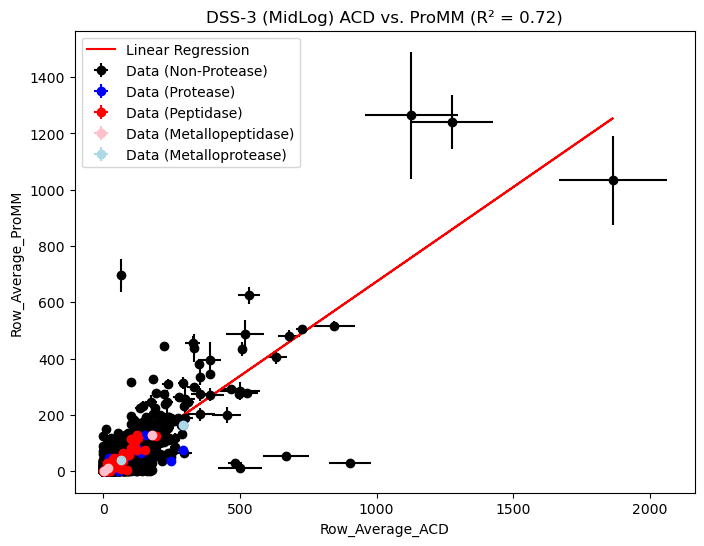

,Value,Annotation,Predicted,Residual
75,102.000000,betaine aldehyde dehydrogenase,71.071676,-65.738342
95,101.000000,poly(3-hydroxyalkanoate) polymerase,70.400353,-67.733686
108,90.000000,PAN domain protein,63.015802,73.317531
167,178.666667,alpha-aminoadipic semialdehyde dehydrogenase,122.539755,-118.539755
233,235.333333,acetyl-CoA acetyltransferase,160.581378,149.085288
...,...,...,...,...
2928,500.000000,Unknown,338.258139,-328.258139
2929,526.333333,Unknown,355.936305,-76.269638
3086,0.000000,Unknown,2.596753,87.069914
3197,0.000000,Unknown,2.596753,123.069914


In [11]:
#Plot DSS3 in Midlog phase grown in AC Difco vs. grown in ProMM minimal medium
slope, intercept, std_err, df1, df2, df3 = plot_and_regression(DSS3_MidLog["Row_Average_ACD"], DSS3_MidLog["Row_Average_ProMM"], DSS3_MidLog["Annotation_ACD"], DSS3_MidLog["STD_ProMM"], DSS3_MidLog["STD_ACD"], title='DSS-3 (MidLog) ACD vs. ProMM', filename ="DSS3_ML_ACDvsProMM.pdf")
# Then extract the outliers
extract_outliers(slope, intercept, std_err, DSS3_MidLog["Row_Average_ACD"], DSS3_MidLog["Row_Average_ProMM"], DSS3_MidLog["Annotation_ACD"], filename='DSS3_ML_ACDvsProMM_outliers.csv')


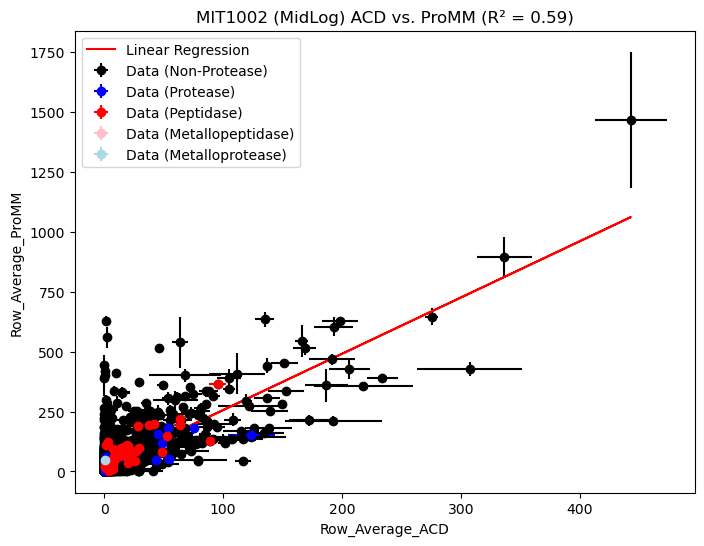

,Value,Annotation,Predicted,Residual
41,6.000000,outer-membrane receptor for ferric coprogen an...,35.375163,221.958171
52,32.333333,hypothetical protein MIT1002_00114 [Alteromona...,97.145145,111.521522
69,17.333333,inorganic pyrophosphatase [Alteromonas macleodii],61.959712,114.706955
128,43.000000,phosphoglycerate mutase [Alteromonas macleodii],122.165898,105.167436
129,5.333333,aconitase [Alteromonas macleodii],33.811365,161.188635
...,...,...,...,...
2365,0.000000,Unknown,21.300989,367.365677
2498,0.000000,Unknown,21.300989,164.032344
2624,0.000000,Unknown,21.300989,117.699011
2676,0.000000,Unknown,21.300989,200.699011


In [12]:
#Plot MIT1002 in Midlog phase grown in AC Difco vs. grown in ProMM minimal medium
slope, intercept, std_err, df1, df2, df3 = plot_and_regression(MIT1002_MidLog["Row_Average_ACD"], MIT1002_MidLog["Row_Average_ProMM"], MIT1002_MidLog["Annotation_ACD"], MIT1002_MidLog["STD_ProMM"], MIT1002_MidLog["STD_ACD"], title='MIT1002 (MidLog) ACD vs. ProMM', filename ="MIT1002_ML_ACDvsProMM.pdf")
extract_outliers(slope, intercept, std_err, MIT1002_MidLog["Row_Average_ACD"], MIT1002_MidLog["Row_Average_ProMM"], MIT1002_MidLog["Annotation_ACD"], filename='MIT1002_ML_ACDvsProMM_outliers.csv')

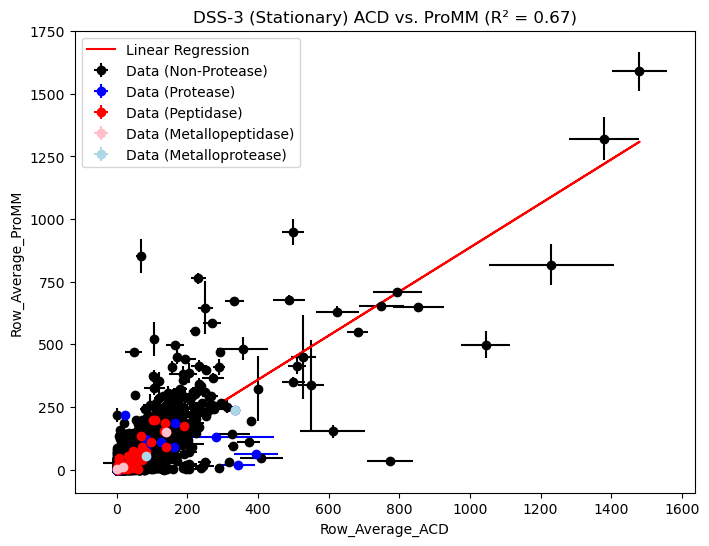

,Value,Annotation,Predicted,Residual
36,500.333333,chaperone protein DnaK,446.757041,-97.757041
47,207.666667,translation initiation factor IF-2,189.402196,87.931138
68,135.666667,betaine aldehyde dehydrogenase,126.089386,-115.089386
88,134.000000,poly(3-hydroxyalkanoate) polymerase,124.623812,-115.290479
101,108.000000,PAN domain protein,101.760853,144.905814
...,...,...,...,...
2727,550.333333,Unknown,490.724270,-152.390936
2754,176.666667,Unknown,162.142514,94.190819
2771,18.666667,Unknown,23.206071,112.793929
2773,107.333333,Unknown,101.174623,87.825377


In [13]:
#Plot DSS3 in Stationary phase grown in AC Difco vs. grown in ProMM minimal medium
slope, intercept, std_err, df1, df2, df3 = plot_and_regression(DSS3_Stat["Row_Average_ACD"], DSS3_Stat["Row_Average_ProMM"], DSS3_Stat["Annotation_ACD"], DSS3_Stat["STD_ProMM"], DSS3_Stat["STD_ACD"], title='DSS-3 (Stationary) ACD vs. ProMM', filename ="DSS3_S_ACDvsProMM.pdf")
extract_outliers(slope, intercept, std_err, DSS3_Stat["Row_Average_ACD"], DSS3_Stat["Row_Average_ProMM"], DSS3_Stat["Annotation_ACD"], filename='DSS3_S_ACDvsProMM_outliers.csv')

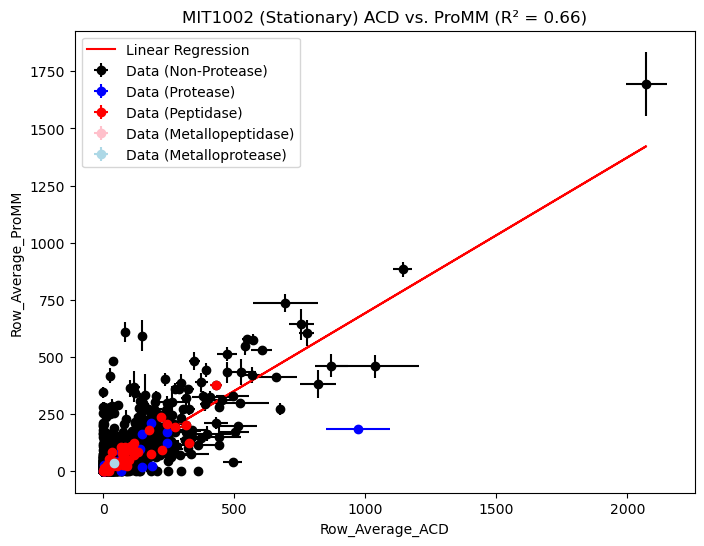

,Value,Annotation,Predicted,Residual
24,361.666667,outer membrane protein [Alteromonas macleodii],256.762050,-256.762050
58,9.000000,outer-membrane receptor for ferric coprogen an...,16.494079,98.839255
88,9.666667,Acyl-CoA hydrolase [Alteromonas macleodii],16.948271,109.718395
201,124.333333,Outer membrane receptor proteins [Alteromonas ...,95.069426,-95.069426
219,239.666667,phosphoglycerate mutase [Alteromonas macleodii],173.644774,93.688559
...,...,...,...,...
2717,0.000000,Unknown,10.362476,154.637524
2835,0.000000,Unknown,10.362476,140.304190
2909,0.000000,Unknown,10.362476,187.637524
2910,0.000000,Unknown,10.362476,151.970857


In [14]:
#Plot MIT1002 in Stationary phase grown in AC Difco vs. grown in ProMM minimal medium
slope, intercept, std_err, df1, df2, df3 = plot_and_regression(MIT1002_Stat["Row_Average_ACD"], MIT1002_Stat["Row_Average_ProMM"], MIT1002_Stat["Annotation_ACD"], MIT1002_Stat["STD_ProMM"], MIT1002_Stat["STD_ACD"], title='MIT1002 (Stationary) ACD vs. ProMM', filename ="MIT1002_S_ACDvsProMM.pdf")
extract_outliers(slope, intercept, std_err, MIT1002_Stat["Row_Average_ACD"], MIT1002_Stat["Row_Average_ProMM"], MIT1002_Stat["Annotation_ACD"], filename='MIT1002_S_ACDvsProMM_outliers.csv')

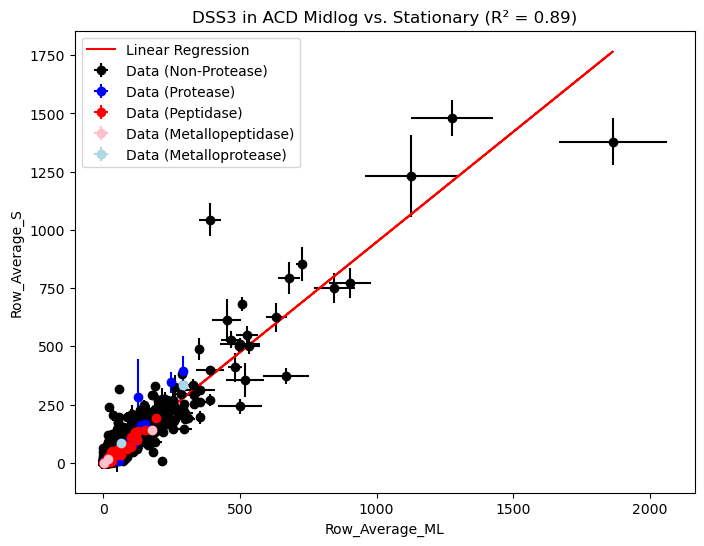

,Value,Annotation,Predicted,Residual
54,274.666667,translation initiation factor IF-2,261.059089,-53.392422
94,85.000000,hypothetical protein,81.526336,67.806997
151,138.000000,"3-isopropylmalate dehydratase, large subunit",131.694539,87.972127
160,36.333333,"PaxA, putative",35.459935,168.873398
167,178.666667,alpha-aminoadipic semialdehyde dehydrogenase,170.188381,119.811619
...,...,...,...,...
2757,0.000000,Heat shock protein,1.067897,61.265437
2782,110.666667,Unknown,105.821629,58.178371
2794,309.333333,Unknown,293.873511,-100.206845
2927,468.333333,Unknown,444.378121,84.621879


In [15]:
#Plot DSS3 grown in AC Difco in Midlog phase vs. Stationary phase 
slope, intercept, std_err, df1, df2, df3 = plot_and_regression(DSS3_ACD_MLS["Row_Average_ML"], DSS3_ACD_MLS["Row_Average_S"], DSS3_ACD_MLS["Annotation_ML"], DSS3_ACD_MLS["STD_S"], DSS3_ACD_MLS["STD_ML"], title='DSS3 in ACD Midlog vs. Stationary', filename="DSS3_ACD_MLS.pdf")
extract_outliers(slope, intercept, std_err, DSS3_ACD_MLS["Row_Average_ML"], DSS3_ACD_MLS["Row_Average_S"], DSS3_ACD_MLS["Annotation_ML"], filename='DSS3_ACD_MLS_outliers.csv')

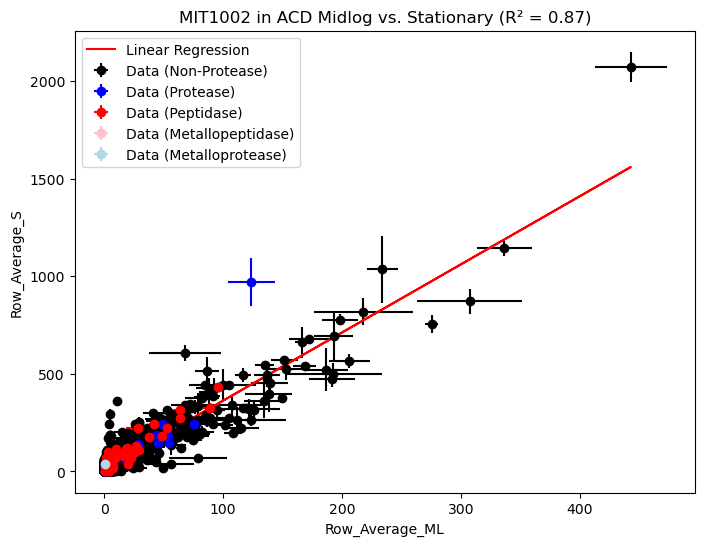

,Value,Annotation,Predicted,Residual
20,11.000000,outer membrane protein [Alteromonas macleodii],51.954707,309.711960
128,43.000000,phosphoglycerate mutase [Alteromonas macleodii],163.644408,76.022258
129,5.333333,aconitase [Alteromonas macleodii],32.176322,117.823678
133,73.333333,LSU ribosomal protein L23P [Alteromonas macleo...,269.516938,-90.183604
143,64.000000,peptidyl-dipeptidase Dcp [Alteromonas macleodii],236.940775,79.725892
...,...,...,...,...
1542,44.000000,FKBP-type peptidyl-prolyl cis-trans isomerase ...,167.134711,-116.468045
1545,3.333333,Zinc carboxypeptidase [Alteromonas macleodii],25.195716,73.137617
1556,52.666667,hypothetical protein MIT1002_04057 [Alteromona...,197.384006,116.282661
1579,192.000000,F-type H+-transporting ATPase subunit alpha [A...,683.699580,-212.366247


In [16]:
#Plot MIT1002 grown in AC Difco in Midlog phase vs. Stationary phase 
slope, intercept, std_err, df1, df2, df3 = plot_and_regression(MIT1002_ACD_MLS["Row_Average_ML"], MIT1002_ACD_MLS["Row_Average_S"], MIT1002_ACD_MLS["Annotation_ML"], MIT1002_ACD_MLS["STD_S"],MIT1002_ACD_MLS["STD_ML"], title='MIT1002 in ACD Midlog vs. Stationary', filename="MIT1002_ACD_MLS.pdf")
extract_outliers(slope, intercept, std_err, MIT1002_ACD_MLS["Row_Average_ML"], MIT1002_ACD_MLS["Row_Average_S"], MIT1002_ACD_MLS["Annotation_ML"], filename='MIT1002_ACD_MLS_outliers.csv')

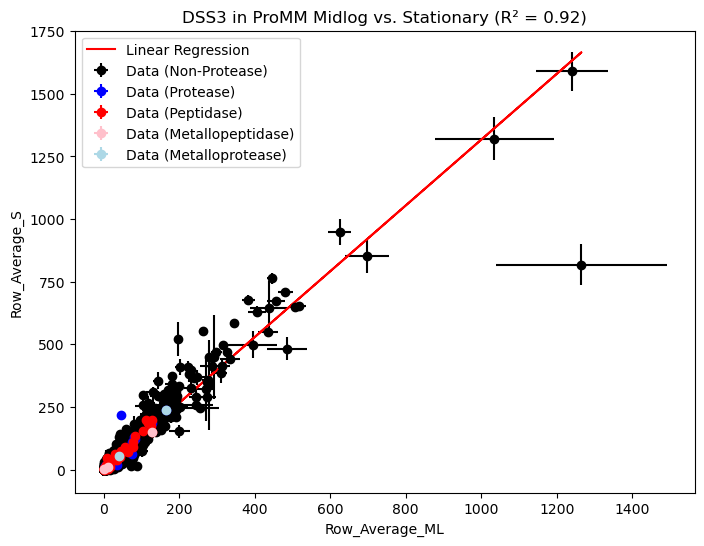

,Value,Annotation,Predicted,Residual
44,163.000000,"preprotein translocase, SecA subunit",217.487226,47.846107
62,98.333333,"ribosomal subunit interface protein, putative",132.528297,46.805037
99,136.333333,PAN domain protein,182.452616,64.214050
234,152.000000,"2-oxoglutarate dehydrogenase, E3 component, di...",203.035450,86.631217
235,139.666667,"2-oxoglutarate dehydrogenase, E2 component, di...",186.831942,43.501391
...,...,...,...,...
2654,118.666667,Unknown,159.242187,108.424480
2692,456.666667,Unknown,603.305871,71.360796
2706,292.666667,Unknown,387.843018,60.823648
2732,159.333333,Unknown,212.669967,43.663366


In [17]:
#Plot DSS3 grown in ProMM in Midlog phase vs. Stationary phase 
slope, intercept, std_err, df1, df2, df3 = plot_and_regression(DSS3_ProMM_MLS["Row_Average_ML"], DSS3_ProMM_MLS["Row_Average_S"], DSS3_ProMM_MLS["Annotation_ML"], DSS3_ProMM_MLS["STD_S"], DSS3_ProMM_MLS["STD_ML"], title='DSS3 in ProMM Midlog vs. Stationary', filename="DSS3_ProMM_MLS.pdf")
extract_outliers(slope, intercept, std_err, DSS3_ProMM_MLS["Row_Average_ML"], DSS3_ProMM_MLS["Row_Average_S"], DSS3_ProMM_MLS["Annotation_ML"], filename='DSS3_ProMM_MLS_outliers.csv')

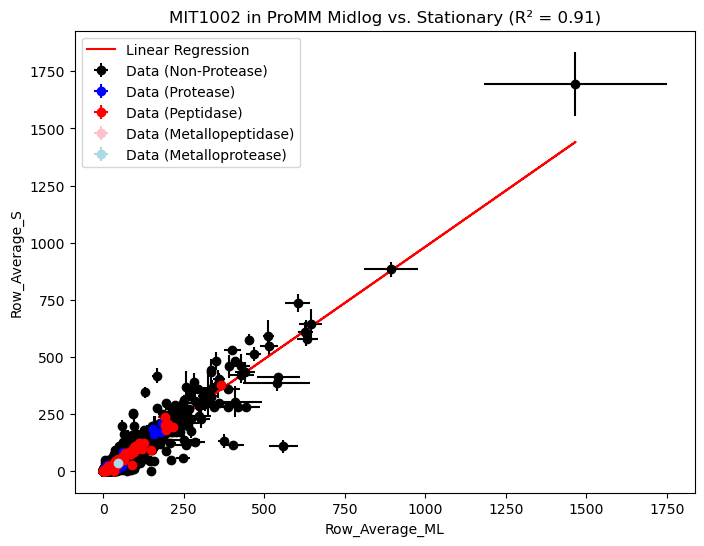

,Value,Annotation,Predicted,Residual
3,238.000000,DNA gyrase subunit B [Alteromonas macleodii],232.428522,-59.428522
58,257.333333,outer-membrane receptor for ferric coprogen an...,251.441025,-136.107691
80,208.666667,hypothetical protein MIT1002_00114 [Alteromona...,203.581966,-79.248633
81,118.000000,iron(III) transport system substrate-binding p...,114.419884,-68.753217
90,74.000000,Acyl-CoA hydrolase [Alteromonas macleodii],71.150050,55.516617
...,...,...,...,...
2739,91.666667,phosphoenolpyruvate carboxykinase (ATP) [Alter...,88.523544,-69.523544
2824,6.000000,TonB-dependent receptor [Alteromonas macleodii],4.278489,45.388178
2834,544.000000,ATP synthase F1 subcomplex beta subunit [Alter...,533.350549,-122.683882
2837,467.666667,F-type H+-transporting ATPase subunit alpha [A...,458.283943,53.382724


In [18]:
#Plot MIT1002 grown in ProMM in Midlog phase vs. Stationary phase 
slope, intercept, std_err, df1, df2, df3 = plot_and_regression(MIT1002_ProMM_MLS["Row_Average_ML"], MIT1002_ProMM_MLS["Row_Average_S"], MIT1002_ProMM_MLS["Annotation_ML"], MIT1002_ProMM_MLS["STD_S"],MIT1002_ProMM_MLS["STD_ML"], title='MIT1002 in ProMM Midlog vs. Stationary', filename="MIT1002_ProMM_MLS.pdf")
extract_outliers(slope, intercept, std_err, MIT1002_ProMM_MLS["Row_Average_ML"], MIT1002_ProMM_MLS["Row_Average_S"], MIT1002_ProMM_MLS["Annotation_ML"], filename='MIT1002_ProMM_MLS_outliers.csv')

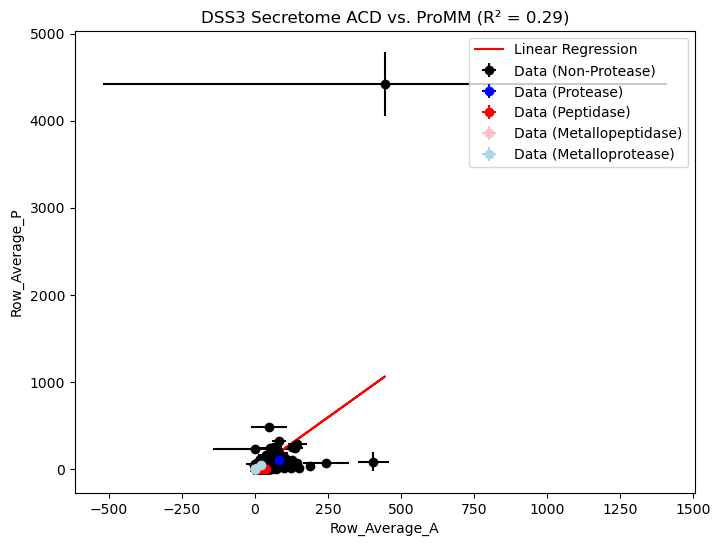

,Value,Annotation,Predicted,Residual
13,190.000000,chaperone protein DnaK,450.291680,-414.291680
0,444.666667,"PaxA, putative",1062.187396,3363.145937
53,80.666667,"malate dehydrogenase, NAD-dependent",187.592996,-164.592996
101,62.333333,"peptidyl-dipeptidase, putative",143.542912,-133.876245
33,84.333333,cold shock family protein,196.403013,-128.736346
14,104.666667,ribosomal protein L2,245.258561,-138.925227
30,150.333333,aminomethyl transferase family protein,354.983316,-344.316649
2,405.666667,"chaperonin, 60 kDa",968.480853,-882.480853
57,73.333333,"carbamoyl-phosphate synthase, large subunit",169.972962,-165.972962
64,68.333333,aspartyl-tRNA synthetase,157.959303,-141.292636


In [19]:
#Plot DSS3 Secretome from cells grown in ACD vs. ProMM
slope, intercept, std_err, df1, df2, df3 = plot_and_regression(Sorted_DSS3_Secretome["Row_Average_A"], Sorted_DSS3_Secretome["Row_Average_P"], Sorted_DSS3_Secretome["Annotation"], Sorted_DSS3_Secretome["STD_A"], Sorted_DSS3_Secretome["STD_P"], title='DSS3 Secretome ACD vs. ProMM', filename="DSS3_Secretome_AP.pdf")
extract_outliers(slope, intercept, std_err, Sorted_DSS3_Secretome["Row_Average_A"], Sorted_DSS3_Secretome["Row_Average_P"], Sorted_DSS3_Secretome["Annotation"], filename='DSS3_Secretome_AP_outliers.csv')

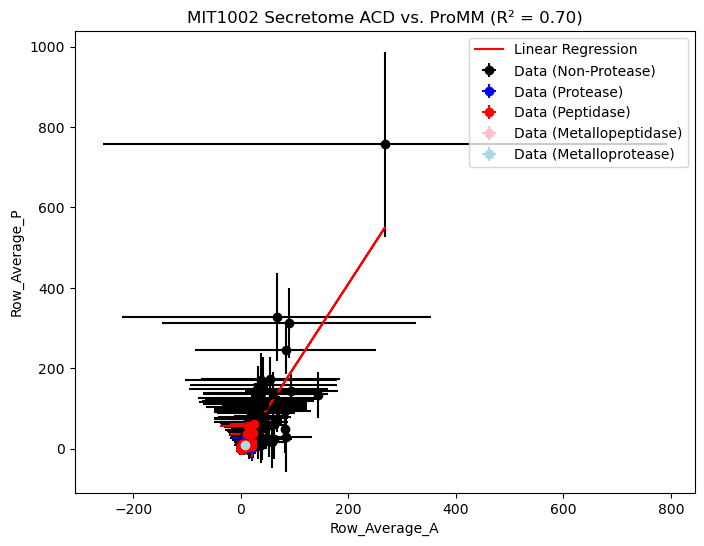

,Value,Annotation,Predicted,Residual
44,51.000000,outer membrane protein [Alteromonas macleodii],103.844551,-79.844551
83,37.333333,M28 family [Alteromonas macleodii],75.722973,-61.056307
37,50.666667,inorganic pyrophosphatase [Alteromonas macleodii],103.158659,-44.158659
103,38.000000,succinylglutamic semialdehyde dehydrogenase [A...,77.094758,-67.094758
14,32.333333,Outer membrane receptor proteins [Alteromonas ...,65.434591,71.232075
31,29.333333,Esterase-like activity of phytase [Alteromonas...,59.261562,45.405105
17,33.666667,outer membrane protein [Alteromonas macleodii],68.178160,50.155173
34,20.666667,hypothetical protein MIT1002_00755 [Alteromona...,41.428366,74.904967
12,42.000000,TonB-dependent receptor [Alteromonas macleodii],85.325463,73.007870
16,31.333333,outer membrane receptor for ferrienterochelin ...,63.376915,54.956418


In [20]:
#Plot MIT1002 Secretome from cells grown in ACD vs. ProMM
slope, intercept, std_err, df1, df2, df3 = plot_and_regression(Sorted_MIT1002_Secretome["Row_Average_A"], Sorted_MIT1002_Secretome["Row_Average_P"], Sorted_MIT1002_Secretome["Annotation"], Sorted_MIT1002_Secretome["STD_A"],Sorted_MIT1002_Secretome["STD_P"], title='MIT1002 Secretome ACD vs. ProMM', filename="MIT1002_Secretome_AP.pdf")
extract_outliers(slope, intercept, std_err, Sorted_MIT1002_Secretome["Row_Average_A"], Sorted_MIT1002_Secretome["Row_Average_P"], Sorted_MIT1002_Secretome["Annotation"], filename='MIT1002_Secretome_AP_outliers.csv')